# PCA using SVD

We use singular value decomposition (SVD) as a tool to compute the principal component of a matrix (representing a real-world dataset) in this notebook.

## Single Value Decomposition

SVD takes a data matrix 𝐗 and produces the matrix factorization 𝐗=𝐔𝚺𝐕<sup>⊤</sup>. This factorization has useful properties that we use to perform dimensionality reduction.

There are restrictions on 𝐔, 𝚺, and 𝐕:

- 𝐔 has dimensions 𝑛×𝑛, 𝚺 has dimensions 𝑛×𝑑, and 𝐕 has dimensions 𝑑×𝑑.

- 𝐔 and 𝐕 are orthogonal matrices. That is, 𝐔<sup>⊤</sup>𝐔=𝐈 and 𝐕<sup>⊤</sup>𝐕=𝐈. This also implies that all columns of 𝐔 and 𝐕 have magnitude 1 and are mutually orthogonal.

- 𝚺 is a diagonal matrix. That is, all elements in 𝚺 are 0 unless they lie on the diagonal. In addition, the diagonal elements in 𝚺 are arranged from biggest to smallest.

To compute the SVD in Python, we use the np.linalg.svd function.  

np.linalg.svd returns a tuple of three arrays corresponding to 𝐔, 𝚺, and 𝐕<sup>⊤</sup>. Notice that the 𝚺 value is one-dimensional numpy array rather than a diagonal matrix, which can cause problems recreating 𝐗 using the return values of np.linalg.svd. For convenience, we often use full_matrices=False in our call to np.linalg.svd, which reduces the dimensions of 𝐔 or 𝐕<sup>⊤</sup> to match the dimensions of 𝚺.  This allows us to use np.diag to create the diagonal matrix 𝚺 and reproduce the original 𝐗:

Let's consider this Weight Height dataset from [Kaggle](https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

htwt = pd.read_csv('../data/height-weights.csv', 
                   index_col='Index')
htwt.head(2)

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873


In [2]:
htwt = htwt.rename(columns={'Height(Inches)': 'height',
                     'Weight(Pounds)': 'weight'})
htwt.head(5)

,height,weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


To examine the principal directions of this data matrix, we first center the data by subtracting the mean of each column.

In [3]:
htwt_centered = htwt - htwt.mean(axis=0)
htwt_centered.head(5)

,height,weight
Index,,
1,-2.209804,-14.086921
2,3.522096,9.407879
3,1.405626,25.947479
4,0.223486,15.255979
5,-0.205304,17.217679


Then, we compute the SVD and display the values in 𝐕<sup>⊤</sup>.

In [4]:
U, S, Vt = svd(htwt_centered, full_matrices=False)
Vt

NameError: name 'svd' is not defined

What happens if we throw away a column of , a singular value from , and a row from ? In this case we end up with the "rank 1 approximation" of the data.

In practice, we use a simpler method to compute the reduced dimension 𝐗 which arises from the following equivalence:


\begin{align}
 X &= U\Sigma V^T\\
XV &= U\Sigma V^T V\\
XV &= U\Sigma
\end{align}


This means that instead of removing rows from 𝐕⊤ and then computing 𝐗𝐕 , we can compute 𝐔𝚺 and then remove columns until we achieve our desired dimensionality. For this reason, we call the columns of 𝐔𝚺 the principal components of 𝐗.

What happens if we throw away a column of 𝐔, a singular value from 𝚺, and a row from V<sup>T</sup> In this case we end up with the "rank 1 approximation" of the data.

Looking at the data, we see that it does a surprisingly good job.

In [ ]:
#Rather than manually invoking linalg.svd over and over, let's just
#define a function that does the rank approximation in one function call
def compute_rank_k_approximation(data, k):
    u, s, vt = np.linalg.svd(data, full_matrices = False)
    return pd.DataFrame(u[:, 0:k] @ np.diag(s[0:k]) @ vt[0:k, :], columns = data.columns)

In [ ]:
htwt_rank1_approx = compute_rank_k_approximation(htwt_centered, 1)
htwt_rank1_approx.head(5)

We can see the PC1 values for the Height-Weight matrix, but what do they mean?

In [ ]:
u, s, vt = np.linalg.svd(htwt_centered, full_matrices=False)
usig=u*s
usig[0:5, 0]

By plotting the data in a 2D space, we can see what's going on. We're simply getting the original data projected on to some 1 dimensional subspace.

In [5]:
sns.scatterplot(x="height", y="weight", data=htwt_rank1_approx)

NameError: name 'htwt_rank1_approx' is not defined

NameError: name 'htwt_rank1_approx' is not defined

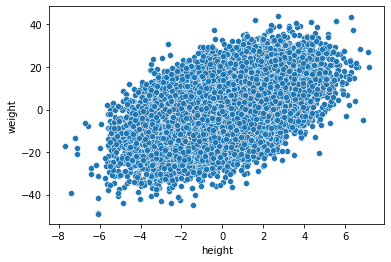

In [6]:
sns.scatterplot(x="height", y="weight", data=htwt_centered)
sns.scatterplot(x="height", y="weight", data=htwt_rank1_approx)

## Wine Dataset

Consider the following wine dataset from [UCI](http://archive.ics.uci.edu/ml/datasets/wine). This dataset contains the results of a chemical analysis of wines grown in the same region in Italy but derived from 3 different cultivars.

In [7]:
wine = pd.read_csv("../data/wine.csv")
X = wine.drop("Customer_Segment",axis=1)
y = wine["Customer_Segment"]

In [8]:
X.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [9]:
X.shape

(178, 13)

This real world dataset is really a linear algebra matrix: 178 x 13.  Viewing data as a matrix gives us access to the rich library of tools from linear algebra, including the SVD. This allows us to answer questions such as: "What characterize clusters of wine?"


## Single Value Decomposition

SVD takes a data matrix 𝐗 and produces the matrix factorization 𝐗=𝐔𝚺𝐕<sup>⊤</sup>. This factorization has useful properties that we use to perform dimensionality reduction.

There are restrictions on 𝐔, 𝚺, and 𝐕:

- 𝐔 has dimensions 𝑛×𝑛, 𝚺 has dimensions 𝑛×𝑑, and 𝐕 has dimensions 𝑑×𝑑.

- 𝐔 and 𝐕 are orthogonal matrices. That is, 𝐔<sup>⊤</sup>𝐔=𝐈 and 𝐕<sup>⊤</sup>𝐕=𝐈. This also implies that all columns of 𝐔 and 𝐕 have magnitude 1 and are mutually orthogonal.

- 𝚺 is a diagonal matrix. That is, all elements in 𝚺 are 0 unless they lie on the diagonal. In addition, the diagonal elements in 𝚺 are arranged from biggest to smallest.

To compute the SVD in Python, we use the np.linalg.svd function.  

np.linalg.svd returns a tuple of three arrays corresponding to 𝐔, 𝚺, and 𝐕<sup>⊤</sup>. Notice that the 𝚺 value is one-dimensional numpy array rather than a diagonal matrix, which can cause problems recreating 𝐗 using the return values of np.linalg.svd. For convenience, we often use full_matrices=False in our call to np.linalg.svd, which reduces the dimensions of 𝐔 or 𝐕<sup>⊤</sup> to match the dimensions of 𝚺.  This allows us to use np.diag to create the diagonal matrix 𝚺 and reproduce the original 𝐗:

In [10]:
from scipy.linalg import svd
U, S, Vt = svd(X, full_matrices=False)

The rows of 𝐕<sup>⊤</sup> (or equivalently the columns of the untransposed 𝐕) contain the principal directions for the matrix 𝐗.

In [11]:
Vt.shape

(13, 13)

In [12]:
# first principal component of X is the first row of Vt (or first column of V)
Vt[0:]

array([[-1.49627683e-02, -2.54474351e-03, -2.70802832e-03,
        -2.13830885e-02, -1.15577596e-01, -2.74422127e-03,
        -2.52832530e-03, -3.91490065e-04, -1.88971728e-03,
        -6.06975016e-03, -1.10917441e-03, -3.06051522e-03,
        -9.92915809e-01],
       [-1.14188469e-01, -2.81196200e-02, -2.21740987e-02,
        -2.28259636e-01, -9.57834595e-01, -1.50669805e-02,
        -8.07652793e-03, -4.27249598e-03, -1.16097546e-02,
        -3.40761623e-02, -7.91544443e-03, -1.96862315e-02,
         1.18626915e-01],
       [-2.66490054e-01, -1.12359811e-01, -6.45661946e-02,
        -9.05890877e-01,  2.58251159e-01, -1.84780284e-02,
         1.17540135e-02, -1.87906147e-02, -6.07173969e-03,
        -1.51710568e-01, -9.85483353e-03, -2.91511467e-02,
        -5.00373434e-03],
       [ 5.98660420e-02,  1.70167832e-01, -6.66243285e-03,
        -1.81842516e-01,  7.39287427e-03, -9.60006779e-02,
        -1.97440467e-01,  1.08161503e-02, -6.17332946e-02,
         9.12650501e-01, -7.10611360e

The principal directions of 𝐗, or the rows of 𝐕<sup>⊤</sup>, align themselves with the direction that the data vary. This is no coincidence: the principal directions of 𝐗 are precisely the orthogonal directions where 𝐗 has the greatest variance.

## SVD $\rightarrow$ Principal Components

We can use principal directions to sketch a procedure for dimensionality reduction. First, we find the principal directions of 𝐗 by centering 𝐗, then using the SVD. If 𝐗 has 13 dimensions (as in our wine dataset), this will produce 13 principal directions. Next, we decide how many dimensions we want to reduce to; a common choice is 2. To reduce to 2 dimensions, we keep the first two principal directions and throw out the other 11. Finally, we project the data onto the first two directions. This is principal component analysis (PCA), a method for dimensionality reduction.

To remove a direction, we simply drop the last 11 from 𝐕<sup>⊤</sup>:

In [13]:
Vt[:2].shape

(2, 13)

Finally, we project the original data points 𝐗 onto the single principal direction. Since the SVD enforces that principal directions in 𝐕<sup>⊤</sup> have magnitude one, this a simply a matrix multiplication 𝐗𝐕, after removing a direction from 𝐕:

In [14]:
X @ Vt[:2].T

,0,1
0,-1072.758361,-0.967325
1,-1054.621609,24.310812
2,-1188.953065,37.591312
3,-1483.244108,61.293558
4,-744.147210,-32.575308
...,...,...
173,-746.463207,-10.014892
174,-757.244278,-16.010371
175,-843.673409,-22.567614
176,-848.627607,-21.891097


We have successfully performed PCA to reduce 𝐗 from 13 dimensions to 2. Dimensionality reduction attempts to summarize the data with fewer dimensions while preserving patterns in the data. 

In practice, we use a simpler method to compute the reduced dimension 𝐗 which arises from the following equivalence:


\begin{align}
 X &= U\Sigma V^T\\
XV &= U\Sigma V^T V\\
XV &= U\Sigma
\end{align}


This means that instead of removing rows from 𝐕⊤ and then computing 𝐗𝐕 , we can compute 𝐔𝚺 and then remove columns until we achieve our desired dimensionality. For this reason, we call the columns of 𝐔𝚺 the principal components of 𝐗.


To reduce 𝐗 from 13 to 2 dimension, we can compute the principal components:

In [15]:
pcs = U @ np.diag(S)
pcs

array([[-1.07275836e+03, -9.67324841e-01,  8.18073186e+00, ...,
         4.27824523e-02, -9.75654612e-02, -6.38812808e-02],
       [-1.05462161e+03,  2.43108121e+01,  5.76623934e+00, ...,
         7.32469432e-02, -1.28205827e-02, -2.85492563e-02],
       [-1.18895307e+03,  3.75913121e+01, -1.64082834e+00, ...,
         2.53798915e-01, -3.92428086e-02,  2.92096624e-02],
       ...,
       [-8.43673409e+02, -2.25676136e+01,  2.89477621e+00, ...,
        -1.96155147e-01,  1.34451308e-01, -4.24769246e-02],
       [-8.48627607e+02, -2.18910965e+01,  3.21011106e+00, ...,
        -2.16994861e-02, -3.33063428e-02, -1.38389302e-01],
       [-5.67953198e+02, -3.33078586e+01, -6.10345453e+00, ...,
         1.08541129e-01, -4.26030126e-02, -5.24989526e-03]])

Let's drop the right most 11 columns

In [16]:
pcs[:, :2]

array([[-1.07275836e+03, -9.67324841e-01],
       [-1.05462161e+03,  2.43108121e+01],
       [-1.18895307e+03,  3.75913121e+01],
       [-1.48324411e+03,  6.12935580e+01],
       [-7.44147210e+02, -3.25753080e+01],
       [-1.45329348e+03,  5.91413091e+01],
       [-1.29255679e+03,  5.56541867e+01],
       [-1.30046887e+03,  3.16564434e+01],
       [-1.04939991e+03,  2.57395543e+01],
       [-1.04955825e+03,  2.43575636e+01],
       [-1.51211318e+03,  7.23554692e+01],
       [-1.28254819e+03,  5.50007323e+01],
       [-1.32155586e+03,  6.56751794e+01],
       [-1.15291192e+03,  4.45113018e+01],
       [-1.54839264e+03,  8.08913532e+01],
       [-1.31432065e+03,  4.21303033e+01],
       [-1.28552183e+03,  3.02261696e+01],
       [-1.13600125e+03,  1.72727461e+01],
       [-1.68124228e+03,  8.98946239e+01],
       [-8.53025373e+02, -1.63727677e+01],
       [-7.89667103e+02, -3.38826047e+01],
       [-7.76997903e+02, -1.25547286e+01],
       [-1.03996670e+03,  2.02779160e+01],
       [-1.

This should produce the same result as right multiplying 𝐗 with a truncated 𝐕:

In [17]:
X @ Vt[:2].T

,0,1
0,-1072.758361,-0.967325
1,-1054.621609,24.310812
2,-1188.953065,37.591312
3,-1483.244108,61.293558
4,-744.147210,-32.575308
...,...,...
173,-746.463207,-10.014892
174,-757.244278,-16.010371
175,-843.673409,-22.567614
176,-848.627607,-21.891097


With this, we can describe the final procedure for PCA. To reduce an 𝑛×𝑑 matrix 𝐗 to 𝑘 dimensions (where 𝑘<𝑑), we perform the following steps:

1. Center 𝐗 .

2. Use the SVD to find 𝐗=𝐔𝚺𝐕<sup>⊤</sup> .

3. Compute the principal components 𝐔𝚺 .

4. Keep the first 𝑘 columns of 𝐔𝚺 .

## Rank-k Approximation

We can also use PCA to construct a rank-k approximation of 𝐗, which produces a rank 𝑘 matrix with the same dimensions as 𝐗. The rank-k appromixation projects the points in 𝐗 onto the top 𝑘 principal directions. The procedure is similar to that of PCA:

1. Center 𝐗 .

2. Use the SVD to find 𝐗=𝐔𝚺𝐕<sup>⊤</sup> .

3. Keep the first 𝑘 columns of 𝐔𝚺 , and the first 𝑘 rows of 𝐕<sup>⊤</sup> 

4. Compute 𝐗=𝐔𝚺𝐕<sup>⊤</sup>  with the reduced 𝐔𝚺 and 𝐕<sup>⊤</sup> 

The function below provides an implementation:

In [18]:
def compute_rank_k_approximation(data, k):
    centered = data - data.mean(axis=0)
    U, S, Vt = np.linalg.svd(centered, full_matrices = False)
    approx = (U @ np.diag(S))[:, :k] @ Vt[:k]
    return pd.DataFrame(approx, columns = data.columns)

As an example, we will compute the rank-1 approximation of the wine data:

In [19]:
rank1 = compute_rank_k_approximation(X, 1)
rank1

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.528580,-0.216946,0.062090,-1.488103,5.692086,0.315323,0.499280,-0.039211,0.191331,0.741342,0.054595,0.224565,318.506573
1,0.502919,-0.206414,0.059075,-1.415859,5.415747,0.300015,0.475041,-0.037307,0.182043,0.705351,0.051945,0.213663,303.043752
2,0.726859,-0.298326,0.085381,-2.046315,7.827280,0.433606,0.686568,-0.053919,0.263103,1.019431,0.075075,0.308803,437.983568
3,1.216639,-0.499348,0.142913,-3.425185,13.101540,0.725783,1.149199,-0.090252,0.440390,1.706355,0.125663,0.516884,733.110309
4,-0.019200,0.007880,-0.002255,0.054054,-0.206758,-0.011454,-0.018136,0.001424,-0.006950,-0.026928,-0.001983,-0.008157,-11.569380
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-0.011582,0.004754,-0.001360,0.032607,-0.124722,-0.006909,-0.010940,0.000859,-0.004192,-0.016244,-0.001196,-0.004921,-6.978975
174,0.005196,-0.002133,0.000610,-0.014629,0.055956,0.003100,0.004908,-0.000385,0.001881,0.007288,0.000537,0.002208,3.131050
175,0.146775,-0.060241,0.017241,-0.413214,1.580570,0.087558,0.138639,-0.010888,0.053129,0.205855,0.015160,0.062357,88.442411
176,0.155069,-0.063645,0.018215,-0.436562,1.669877,0.092506,0.146473,-0.011503,0.056131,0.217486,0.016017,0.065880,93.439694


## When is PCA useful?

We primarily use PCA for exploratory data analysis: when we do not yet know what information the dataset captures or what we might use the data to predict. As a dimensionality reduction technique, PCA is useful primarily when our data contain many columns, and when we have reason to believe that the data are inherently low rank, that the patterns in the data can be summarized with a linear combination of columns.


### Scree Plots

We use PCA to calculate low-dimensional approximations for high-dimensional data. How accurate are these approximations? To answer this question, we create scree plots using the singular values of the data which describe the captured variance of each principal component.

Recall that SVD takes a data matrix 𝐗 and produces the matrix factorization 𝐗=𝐔𝚺𝐕<sup>⊤</sup>. We know that the matrix 𝐕<sup>⊤</sup> contains the principal directions of 𝐗 and that the product 𝐔𝚺 contains the principal components. Now we examine the values in 𝚺.

SVD requires that 𝚺 is a diagonal matrix with elements arranged from largest to smallest. The diagonal elements of 𝚺 are called the singular values of 𝐗. Importantly, the relative magnitude of the singular values precisely represent the percent of variance captured by each principal component.

Consider our wine dataset:

In [20]:
X.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


First, we center the data and apply SVD. We display the singular values in 𝚺 (recall that the svd function produces a one-dimensional array rather than a matrix).

In [22]:
X_centered = X - X.mean(axis=0)
U, s, Vt = svd(X_centered, full_matrices=False)
s

array([4.19031225e+03, 1.74753375e+02, 4.08723149e+01, 2.97226953e+01,
       1.47480712e+01, 1.22011600e+01, 7.02697044e+00, 5.17633888e+00,
       4.45433804e+00, 3.56249362e+00, 2.57894324e+00, 1.93127129e+00,
       1.20501264e+00])

The original data has 13 columns, which result in 13 principal components (and 13 principal directions):

In [23]:
pcs = U @ np.diag(s)
pcs.shape

(178, 13)

We often keep only the first two principal components to facilitate further visualization (e.g. scatter plot). How much information do we lose from this approximation? We can quantify this by squaring each element in 𝚺, then dividing by the sum so all the elements sum to 1.

In [24]:
(s**2) / sum(s**2)

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

The values in this array contain the captured variance of each principal component. In this case, the first principal component captures 99.8% of the variance in the original data! 

A scree plot is a plot of the squared singular values and provides a visualization of the captured variance:

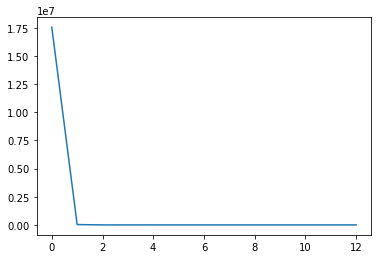

In [29]:
import matplotlib.pyplot as plt
plt.plot(s**2);
# plt.yscale('log')

Like the numeric values, the scree plot suggests that most of the variance in the data can be captured with just the 1st principal component. For PCA, this  means that a scatter plot of the first principal dimension preserves useful patterns in the data and gives us more confidence in proceeding with PCA.